In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seawater as sw
from dymodes import dymodes
path = '../../data/'
pclim = path+'cmems_climatology_mon.nc'

tl,zl,yl,xl = slice(None),slice(-1),slice(-8,8),slice(160,180)
with xr.open_dataset(pclim) as clim:
    t = clim['thetao'][tl,zl].loc[:,:,yl,xl]
    s = clim['so'][tl,zl].loc[:,:,yl,xl]
    print(t.shape)
    to = t.mean(['time','latitude','longitude']).values
    so = s.mean(['time','latitude','longitude']).values
    dep = clim['depth'][zl].values
    dr = np.zeros(dep.shape)
    lev = 0
    for i in range(dep.size):
        dr[i] = 2*(dep[i]-lev)
        lev += dr[i]
pdo = sw.dens0(so,to)

/tmp/ipykernel_22783/1234798551.py:4: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw


(12, 49, 193, 241)


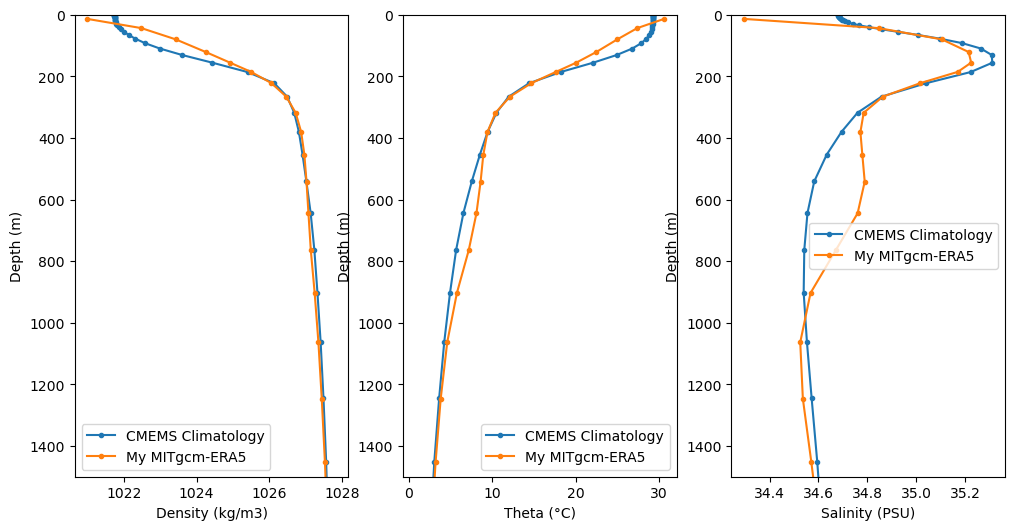

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seawater as sw
from dymodes import dymodes
path = '../output/251116/'
pgrid = path+'grid.nc'
pdync = path+'dync.nc'
with xr.open_dataset(pgrid) as grid:
    z = -grid['Z'].values
    dz = grid['Zl'].values-grid['Zu'].values

i = 29
tl,zl = slice(i*12,(i+1)*12),slice(None)
with xr.open_dataset(pdync) as dync:
    t = dync['THETA'][tl].loc[:,zl,yl,xl]
    s = dync['SALT'][tl].loc[:,zl,yl,xl]
    t,s = t.where(t), s.where(s)
    t = t.mean(['T','Y','X']).values
    s = s.mean(['T','Y','X']).values
    u = dync['UVEL'][tl].loc[:,zl,yl,xl]
    x = u[u.dims[3]].values
    y = u[u.dims[2]].values
pd = sw.dens0(s,t)
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.plot(pdo,dep,marker='.',label='CMEMS Climatology')
plt.plot(pd,z,marker='.',label='My MITgcm-ERA5')
plt.xlabel('Density (kg/m3)')
plt.ylabel('Depth (m)')
plt.ylim(1500,0)
plt.legend()
plt.subplot(132)
plt.plot(to,dep,marker='.',label='CMEMS Climatology')
plt.plot(t,z,marker='.',label='My MITgcm-ERA5')
plt.xlabel('Theta (°C)')
plt.ylabel('Depth (m)')
plt.ylim(1500,0)
plt.legend()
plt.subplot(133)
plt.plot(so,dep,marker='.',label='CMEMS Climatology')
plt.plot(s,z,marker='.',label='My MITgcm-ERA5')
plt.xlabel('Salinity (PSU)')
plt.ylabel('Depth (m)')
plt.ylim(1500,0)
plt.legend()


In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seawater as sw
from dymodes import dymodes
path = '../../data/'
pclim = path+'cmems_climatology_mon.nc'
tl,zl,yl,xl = slice(None),slice(-1),slice(-15,15),slice(170,180)
with xr.open_dataset(pclim) as clim:
    to = clim['thetao'][tl,zl].loc[:,:,yl,xl]
    so = clim['so'][tl,zl].loc[:,:,yl,xl]
    uo = clim['uo'][tl,zl].loc[:,:,yl,xl]
    xo = uo[uo.dims[3]].values
    yo = uo[uo.dims[2]].values
    zo = uo[uo.dims[1]].values
    to = to.mean(['time','longitude']).values
    so = so.mean(['time','longitude']).values
    uo = uo.mean(['time','longitude']).values

path = '../output/251116/'
i = 25
tl,zl = slice(i*12,(i+5)*12),slice(None)
with xr.open_dataset(path+'grid.nc') as grid:
    z = -grid['Z'].values
with xr.open_dataset(path+'dync.nc') as dync:
    t = dync['THETA'][tl].loc[:,zl,yl,xl]
    s = dync['SALT'][tl].loc[:,zl,yl,xl]
    u = dync['UVEL'][tl].loc[:,zl,yl,xl]
    x = u[u.dims[3]].values
    y = u[u.dims[2]].values
    t,s = t.where(t), s.where(s)
    u = u.where(u)
    t = t.mean(['T','X']).values
    s = s.mean(['T','X']).values
    u = u.mean(['T','Xp1']).values


(2000.0, 0.0)

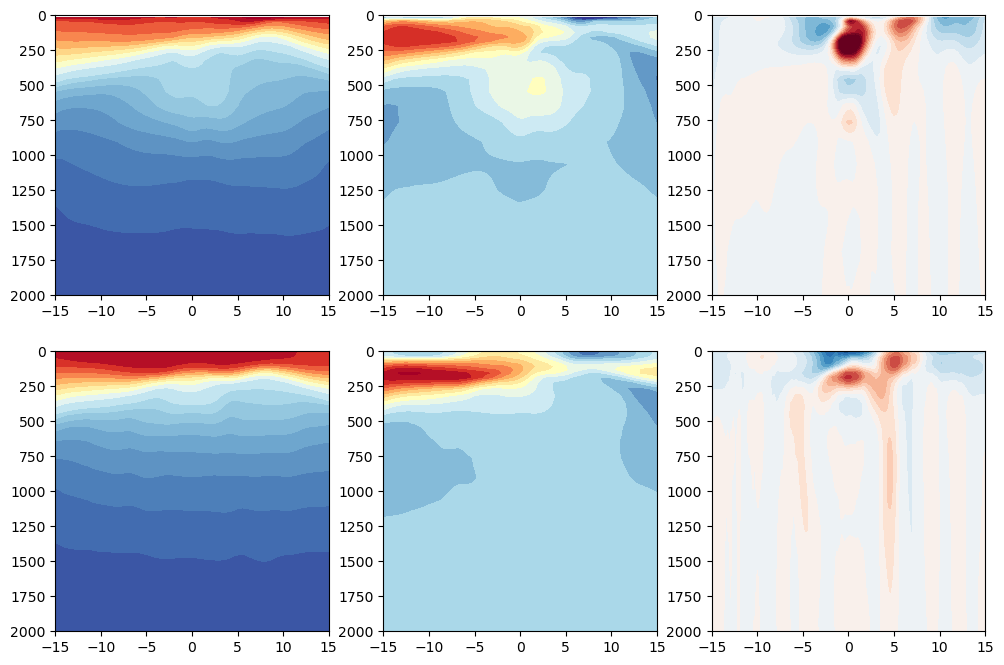

In [8]:
ylim = [2000,0]
plt.figure(figsize=(12,8))
levels = np.concatenate((np.arange(1,10,1),np.arange(10,32,2)))
plt.subplot(231)
plt.contourf(y,z,t,levels,cmap='RdYlBu_r',extend='both')
plt.ylim(ylim)
plt.subplot(234)
plt.contourf(yo,zo,to,levels,cmap='RdYlBu_r',extend='both')
plt.ylim(ylim)
vmin,vmax = 34,36
levels = np.linspace(34,36,16)
plt.subplot(232)
plt.contourf(y,z,s,levels,cmap='RdYlBu_r',extend='both')
plt.ylim(ylim)
plt.subplot(235)
plt.contourf(yo,zo,so,levels,cmap='RdYlBu_r',extend='both')
plt.ylim(ylim)
vmin,vmax = -1,1
levels = np.linspace(-.5,.5,21)
plt.subplot(233)
plt.contourf(y,z,u,levels,cmap='RdBu_r',extend='both')
plt.ylim(ylim)
plt.subplot(236)
plt.contourf(yo,zo,uo,levels,cmap='RdBu_r',extend='both')
plt.ylim(ylim)